<a href="https://colab.research.google.com/github/imranahmed123/DataScience-AI-ML/blob/main/MyNotebook1_TypesofDistributions_310524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A histogram displays the frequency distribution of a dataset by dividing the data into bins and showing the count of observations in each bin.

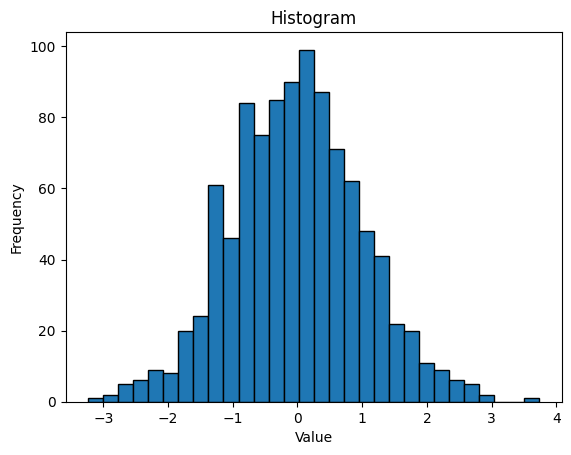

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data from a normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)

# Plot histogram
plt.hist(data, bins=30, edgecolor='k')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


Probability Density Function (PDF)
A PDF shows the likelihood of a continuous random variable taking on a particular value.


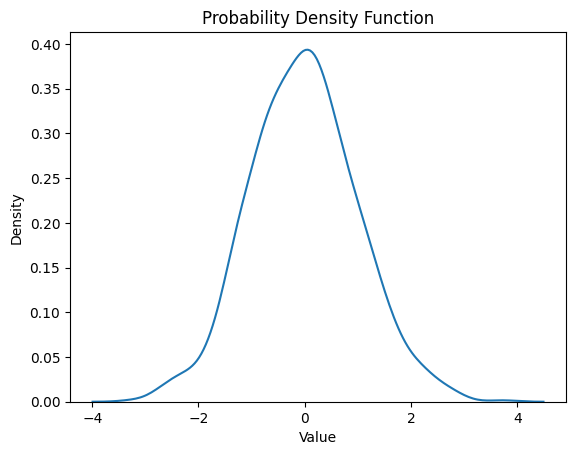

In [2]:
import seaborn as sns

# Plot PDF
sns.kdeplot(data)
plt.title('Probability Density Function')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


Cumulative Distribution Function (CDF)
A CDF shows the probability that a random variable will take on a value less than or equal to a specific value.

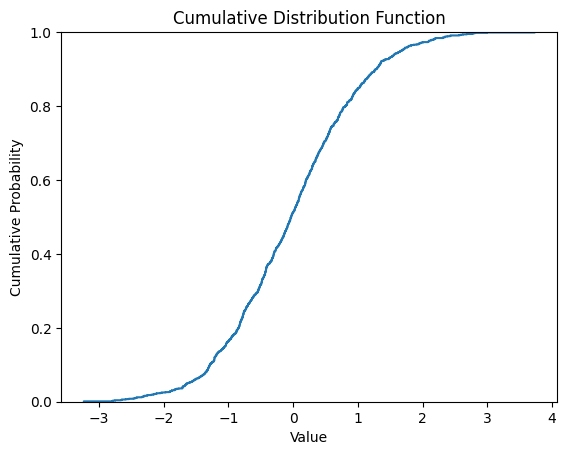

In [3]:
# Plot CDF
sns.ecdfplot(data)
plt.title('Cumulative Distribution Function')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.show()


Standardization vs. Normalization
Standardization: Standardization transforms data to have a mean of 0 and a standard deviation of 1.

Normalization:Normalization transforms data to a specific range, often [0, 1] or [-1, 1].

Applying Both Standardization and Normalization
We'll use the array [50,60,70,80,90] and apply both standardization and normalization to it. Then, we'll plot the original, standardized, and normalized values.

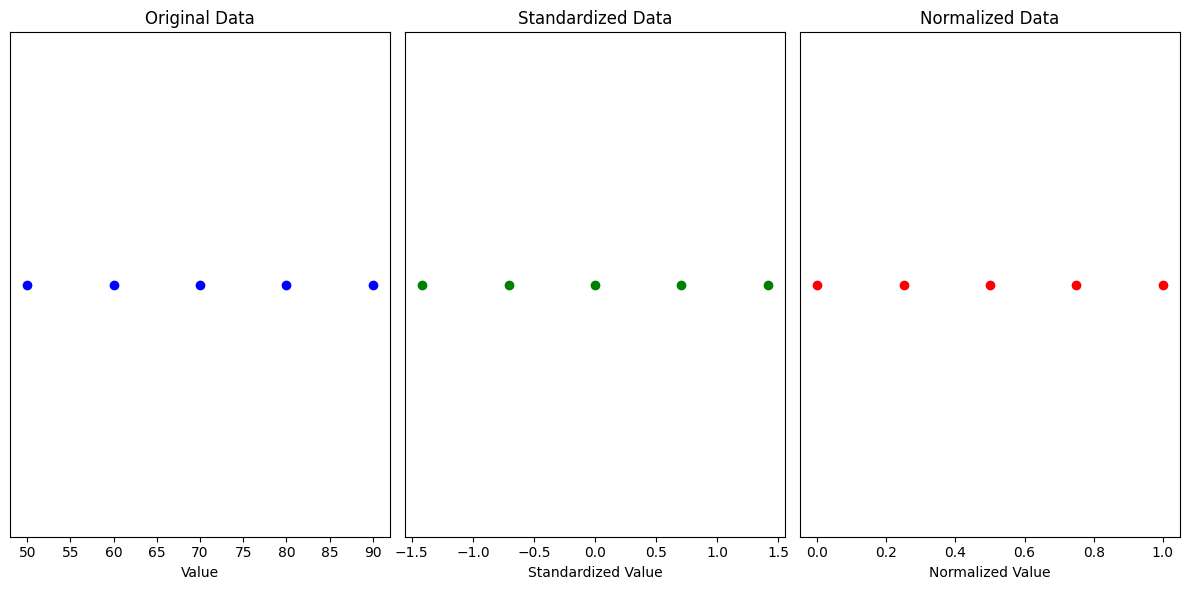

Original Data:
 [[50]
 [60]
 [70]
 [80]
 [90]]
Standardized Data:
 [[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]
Normalized Data:
 [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Example data
data = np.array([[50], [60], [70], [80], [90]])

# Standardization using StandardScaler
scaler_standard = StandardScaler()
standardized_data = scaler_standard.fit_transform(data)

# Normalization using MinMaxScaler
scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(data)

# Plotting the results
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 3, 1)
plt.scatter(data, np.zeros_like(data), color='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('Value')
plt.yticks([])

# Standardized Data
plt.subplot(1, 3, 2)
plt.scatter(standardized_data, np.zeros_like(standardized_data), color='green', label='Standardized Data')
plt.title('Standardized Data')
plt.xlabel('Standardized Value')
plt.yticks([])

# Normalized Data
plt.subplot(1, 3, 3)
plt.scatter(normalized_data, np.zeros_like(normalized_data), color='red', label='Normalized Data')
plt.title('Normalized Data')
plt.xlabel('Normalized Value')
plt.yticks([])

plt.tight_layout()
plt.show()

print("Original Data:\n", data)
print("Standardized Data:\n", standardized_data)
print("Normalized Data:\n", normalized_data)


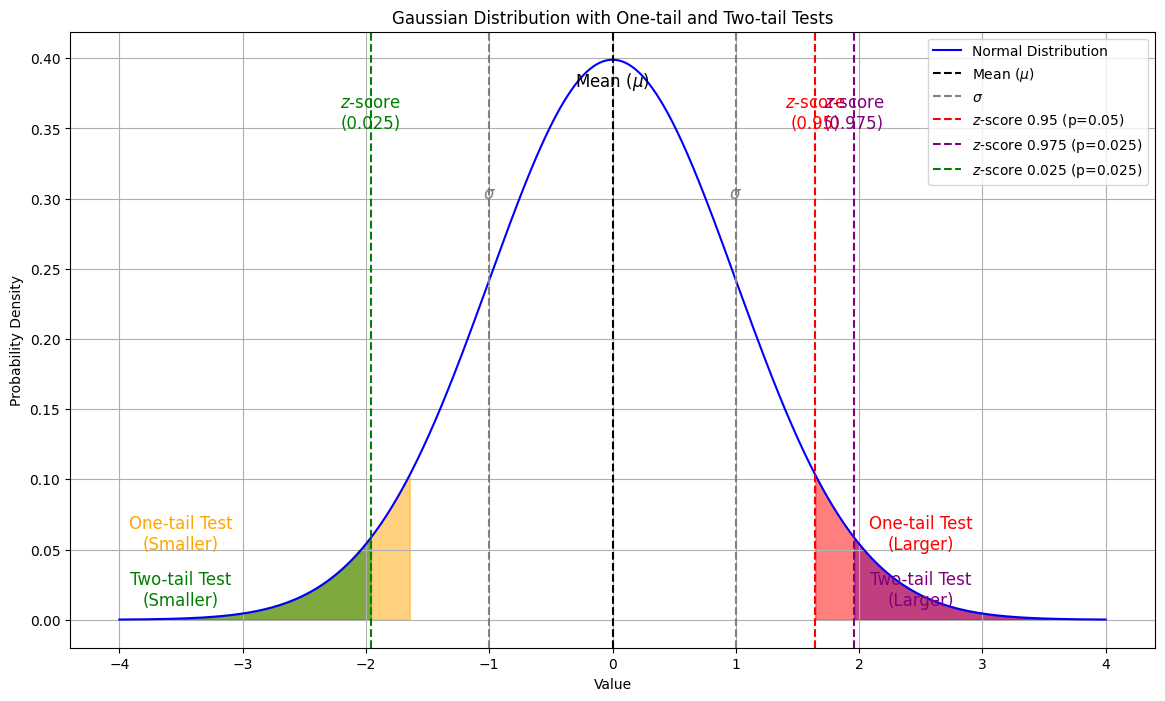

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the data for the Gaussian distribution
mu = 0
sigma = 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

# Create the plot
plt.figure(figsize=(14, 8))
plt.plot(x, y, label='Normal Distribution', color='blue')

# One-tail test (larger)
x_one_tail = np.linspace(stats.norm.ppf(0.95), mu + 4*sigma, 100)
y_one_tail = stats.norm.pdf(x_one_tail, mu, sigma)
plt.fill_between(x_one_tail, y_one_tail, color='red', alpha=0.5)
plt.text(mu + 2.5*sigma, 0.05, 'One-tail Test\n(Larger)', color='red', fontsize=12, ha='center')

# One-tail test (smaller)
x_one_tail_left = np.linspace(mu - 4*sigma, stats.norm.ppf(0.05), 100)
y_one_tail_left = stats.norm.pdf(x_one_tail_left, mu, sigma)
plt.fill_between(x_one_tail_left, y_one_tail_left, color='orange', alpha=0.5)
plt.text(mu - 3.5*sigma, 0.05, 'One-tail Test\n(Smaller)', color='orange', fontsize=12, ha='center')

# Two-tail test (smaller)
x_two_tail_left = np.linspace(mu - 4*sigma, stats.norm.ppf(0.025), 100)
y_two_tail_left = stats.norm.pdf(x_two_tail_left, mu, sigma)
plt.fill_between(x_two_tail_left, y_two_tail_left, color='green', alpha=0.5)
plt.text(mu - 3.5*sigma, 0.01, 'Two-tail Test\n(Smaller)', color='green', fontsize=12, ha='center')

# Two-tail test (larger)
x_two_tail_right = np.linspace(stats.norm.ppf(0.975), mu + 4*sigma, 100)
y_two_tail_right = stats.norm.pdf(x_two_tail_right, mu, sigma)
plt.fill_between(x_two_tail_right, y_two_tail_right, color='purple', alpha=0.5)
plt.text(mu + 2.5*sigma, 0.01, 'Two-tail Test\n(Larger)', color='purple', fontsize=12, ha='center')

# Add annotations for mean, mu, sigma, z-score, and p-value
plt.axvline(mu, color='black', linestyle='--', label='Mean ($\mu$)')
plt.text(mu, 0.38, 'Mean ($\mu$)', color='black', fontsize=12, ha='center')

plt.axvline(mu + sigma, color='grey', linestyle='--', label='$\sigma$')
plt.text(mu + sigma, 0.30, '$\sigma$', color='grey', fontsize=12, ha='center')

plt.axvline(mu - sigma, color='grey', linestyle='--')
plt.text(mu - sigma, 0.30, '$\sigma$', color='grey', fontsize=12, ha='center')

# Z-scores at critical values
z_95 = stats.norm.ppf(0.95)
plt.axvline(z_95, color='red', linestyle='--', label='$z$-score 0.95 (p=0.05)')
plt.text(z_95, 0.35, '$z$-score\n(0.95)', color='red', fontsize=12, ha='center')

z_975 = stats.norm.ppf(0.975)
plt.axvline(z_975, color='purple', linestyle='--', label='$z$-score 0.975 (p=0.025)')
plt.text(z_975, 0.35, '$z$-score\n(0.975)', color='purple', fontsize=12, ha='center')

z_025 = stats.norm.ppf(0.025)
plt.axvline(z_025, color='green', linestyle='--', label='$z$-score 0.025 (p=0.025)')
plt.text(z_025, 0.35, '$z$-score\n(0.025)', color='green', fontsize=12, ha='center')

# Add labels and legend
plt.title('Gaussian Distribution with One-tail and Two-tail Tests')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


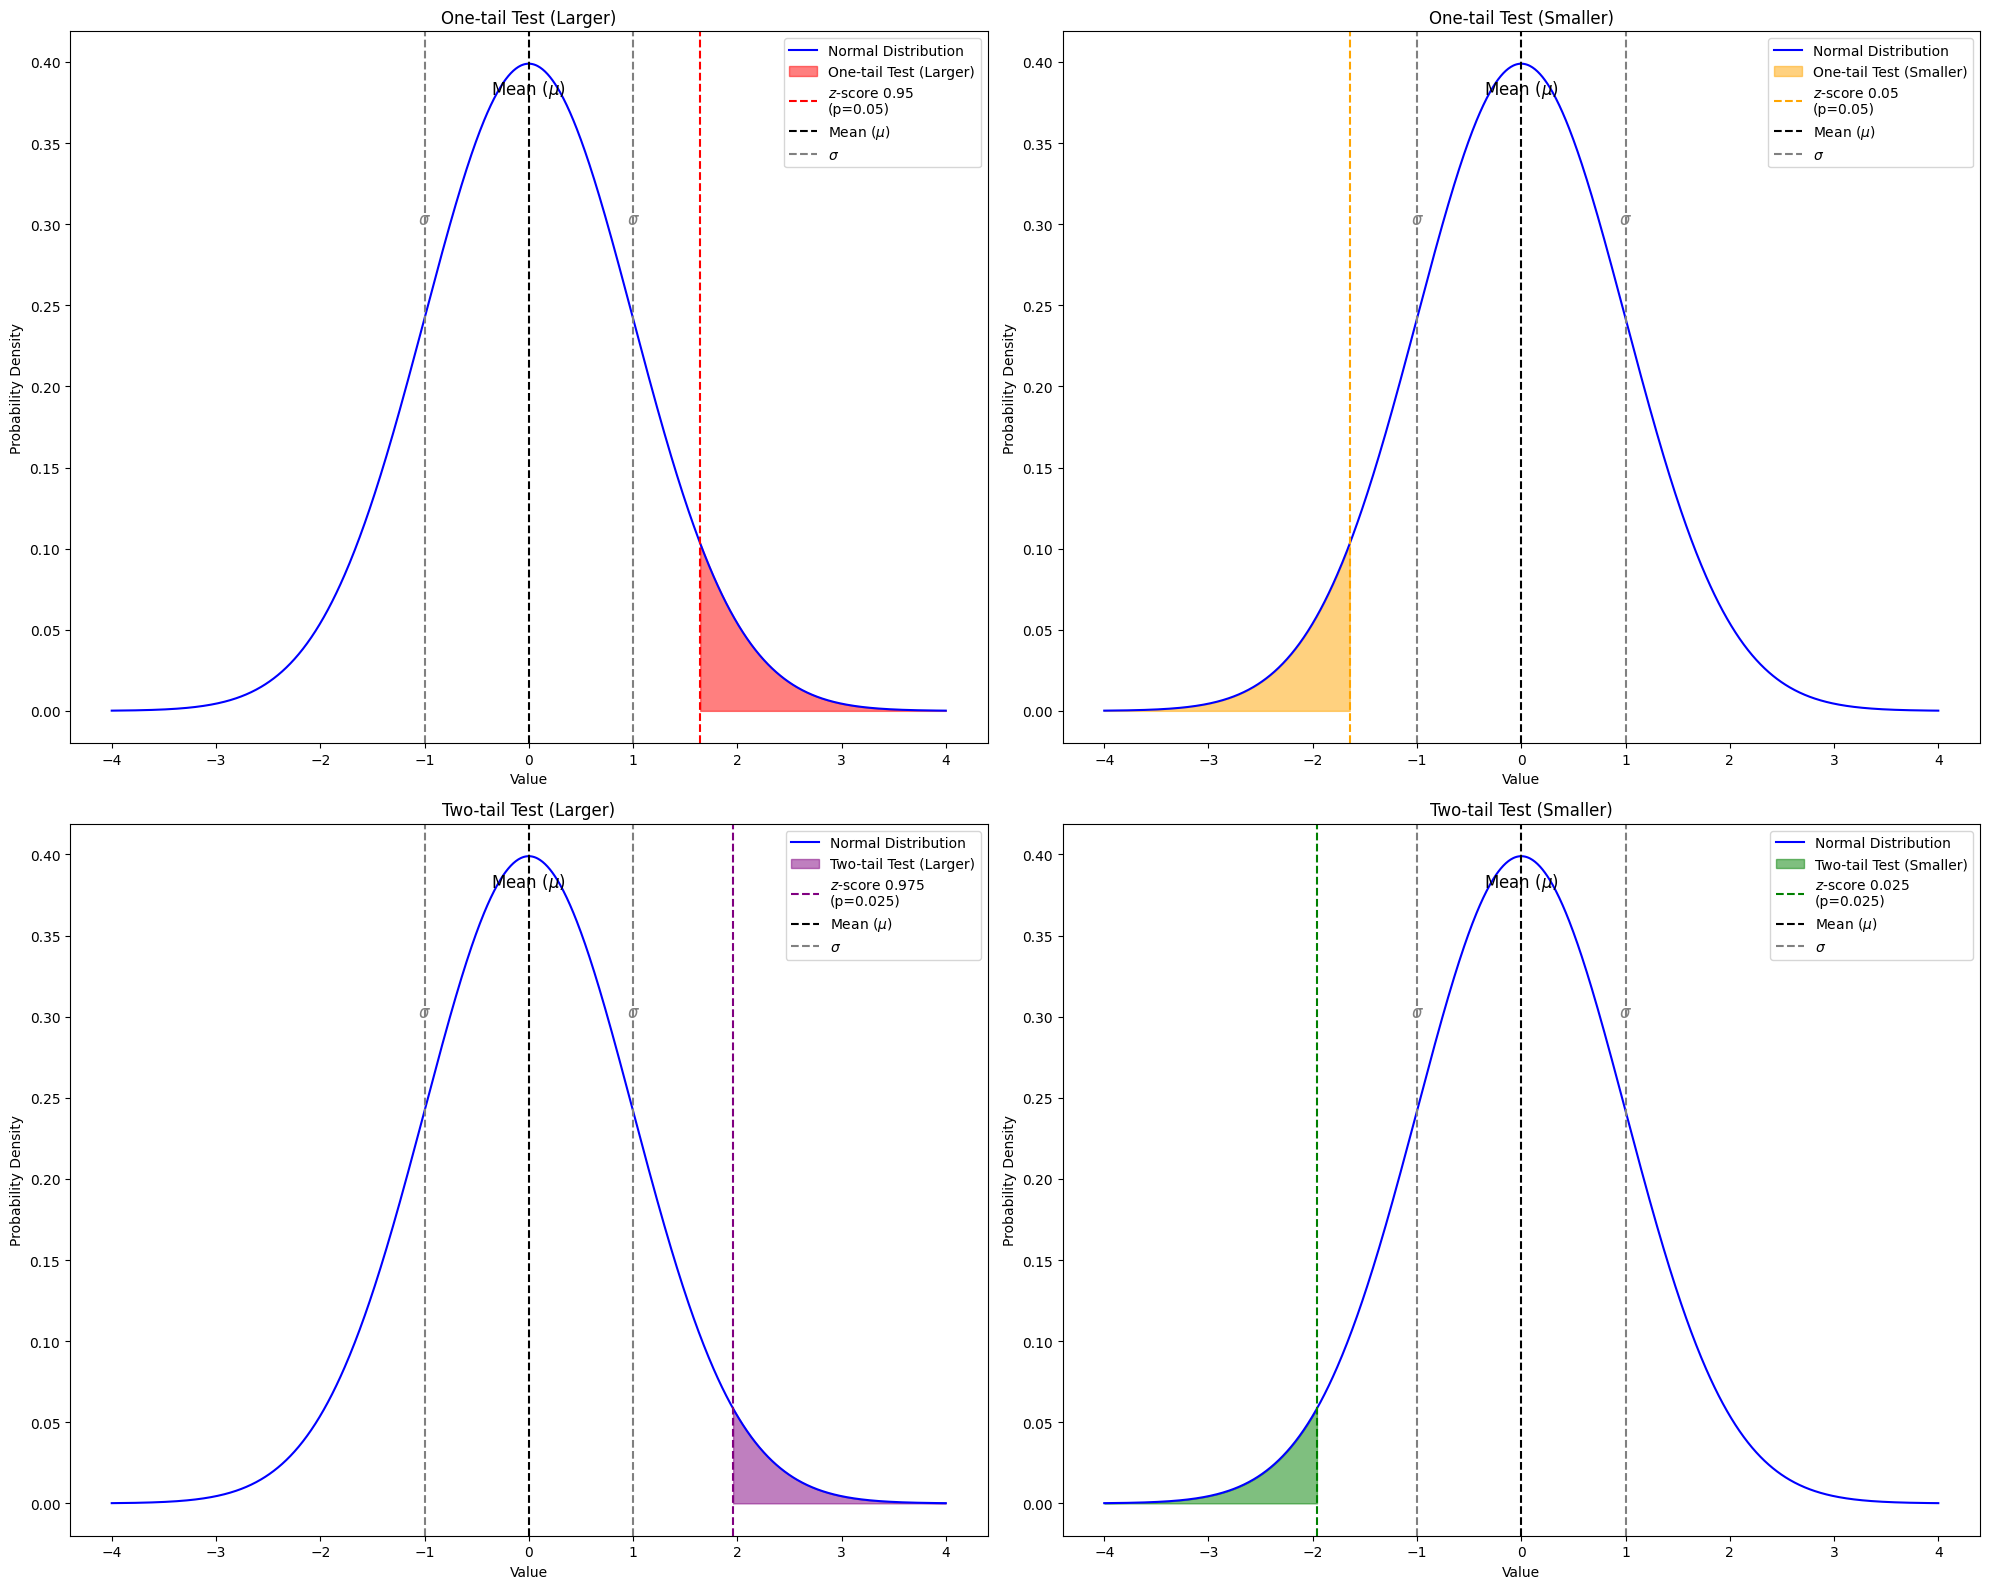

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the data for the Gaussian distribution
mu = 0
sigma = 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

# Z-scores and p-values
z_95 = stats.norm.ppf(0.95)
z_975 = stats.norm.ppf(0.975)
z_025 = stats.norm.ppf(0.025)
p_value_95 = 0.05
p_value_975 = 0.025
p_value_025 = 0.025

# Plot settings
plt.figure(figsize=(20, 16))

# One-tail test (larger)
plt.subplot(2, 2, 1)
plt.plot(x, y, label='Normal Distribution', color='blue')
x_one_tail = np.linspace(z_95, mu + 4*sigma, 100)
y_one_tail = stats.norm.pdf(x_one_tail, mu, sigma)
plt.fill_between(x_one_tail, y_one_tail, color='red', alpha=0.5, label='One-tail Test (Larger)')
plt.axvline(z_95, color='red', linestyle='--', label='$z$-score 0.95\n(p=0.05)')
plt.axvline(mu, color='black', linestyle='--', label='Mean ($\mu$)')
plt.axvline(mu + sigma, color='grey', linestyle='--', label='$\sigma$')
plt.axvline(mu - sigma, color='grey', linestyle='--')
plt.text(mu, 0.38, 'Mean ($\mu$)', color='black', fontsize=12, ha='center')
plt.text(mu + sigma, 0.30, '$\sigma$', color='grey', fontsize=12, ha='center')
plt.text(mu - sigma, 0.30, '$\sigma$', color='grey', fontsize=12, ha='center')
plt.title('One-tail Test (Larger)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# One-tail test (smaller)
plt.subplot(2, 2, 2)
plt.plot(x, y, label='Normal Distribution', color='blue')
x_one_tail_left = np.linspace(mu - 4*sigma, stats.norm.ppf(0.05), 100)
y_one_tail_left = stats.norm.pdf(x_one_tail_left, mu, sigma)
plt.fill_between(x_one_tail_left, y_one_tail_left, color='orange', alpha=0.5, label='One-tail Test (Smaller)')
plt.axvline(stats.norm.ppf(0.05), color='orange', linestyle='--', label='$z$-score 0.05\n(p=0.05)')
plt.axvline(mu, color='black', linestyle='--', label='Mean ($\mu$)')
plt.axvline(mu + sigma, color='grey', linestyle='--', label='$\sigma$')
plt.axvline(mu - sigma, color='grey', linestyle='--')
plt.text(mu, 0.38, 'Mean ($\mu$)', color='black', fontsize=12, ha='center')
plt.text(mu + sigma, 0.30, '$\sigma$', color='grey', fontsize=12, ha='center')
plt.text(mu - sigma, 0.30, '$\sigma$', color='grey', fontsize=12, ha='center')
plt.title('One-tail Test (Smaller)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Two-tail test (larger)
plt.subplot(2, 2, 3)
plt.plot(x, y, label='Normal Distribution', color='blue')
x_two_tail_right = np.linspace(z_975, mu + 4*sigma, 100)
y_two_tail_right = stats.norm.pdf(x_two_tail_right, mu, sigma)
plt.fill_between(x_two_tail_right, y_two_tail_right, color='purple', alpha=0.5, label='Two-tail Test (Larger)')
plt.axvline(z_975, color='purple', linestyle='--', label='$z$-score 0.975\n(p=0.025)')
plt.axvline(mu, color='black', linestyle='--', label='Mean ($\mu$)')
plt.axvline(mu + sigma, color='grey', linestyle='--', label='$\sigma$')
plt.axvline(mu - sigma, color='grey', linestyle='--')
plt.text(mu, 0.38, 'Mean ($\mu$)', color='black', fontsize=12, ha='center')
plt.text(mu + sigma, 0.30, '$\sigma$', color='grey', fontsize=12, ha='center')
plt.text(mu - sigma, 0.30, '$\sigma$', color='grey', fontsize=12, ha='center')
plt.title('Two-tail Test (Larger)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Two-tail test (smaller)
plt.subplot(2, 2, 4)
plt.plot(x, y, label='Normal Distribution', color='blue')
x_two_tail_left = np.linspace(mu - 4*sigma, z_025, 100)
y_two_tail_left = stats.norm.pdf(x_two_tail_left, mu, sigma)
plt.fill_between(x_two_tail_left, y_two_tail_left, color='green', alpha=0.5, label='Two-tail Test (Smaller)')
plt.axvline(z_025, color='green', linestyle='--', label='$z$-score 0.025\n(p=0.025)')
plt.axvline(mu, color='black', linestyle='--', label='Mean ($\mu$)')
plt.axvline(mu + sigma, color='grey', linestyle='--', label='$\sigma$')
plt.axvline(mu - sigma, color='grey', linestyle='--')
plt.text(mu, 0.38, 'Mean ($\mu$)', color='black', fontsize=12, ha='center')
plt.text(mu + sigma, 0.30, '$\sigma$', color='grey', fontsize=12, ha='center')
plt.text(mu - sigma, 0.30, '$\sigma$', color='grey', fontsize=12, ha='center')
plt.title('Two-tail Test (Smaller)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()
